In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df = df.rename(columns={
    'MntWines'        :'Wines',
    'MntFruits'       :'Fruits',
    'MntMeatProducts' :'Meat',
    'MntFishProducts' :'Fish',
    'MntSweetProducts':'Sweets',
    'MntGoldProds'    :'Gold'
})

In [10]:
df['CustomerAge'] = datetime.now().year - df.Year_Birth

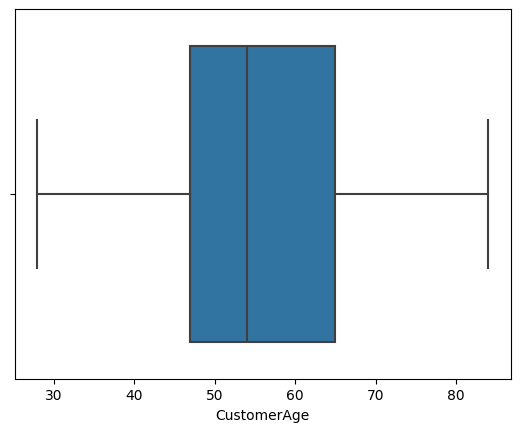

In [17]:
sns.boxplot(x="CustomerAge", data=df)
plt.show()

In [50]:
df = df[df['CustomerAge'] <= 90]

In [51]:
df['days_joined'] = datetime.now().date() - df.Dt_Customer
df['days_joined'] = df.days_joined.apply(lambda x: x.days)

df['Seniority'] = round(df.days_joined / 365, 2)

df.drop('days_joined', axis=1, inplace=True)

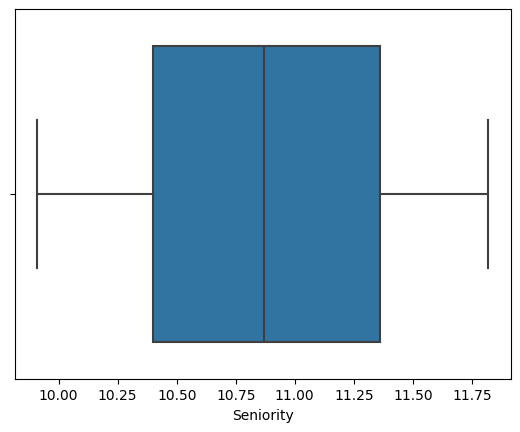

In [52]:
sns.boxplot(x="Seniority", data=df)
plt.show()

In [21]:
df.Marital_Status.value_counts()

Marital_Status
Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [22]:
df = df[(df.Marital_Status != 'YOLO') & (df.Marital_Status != 'Absurd')]

In [27]:
def married_single(x):
    relationship = {
        'Married' :'couple',
        'Together':'couple',
        'Single'  :'seul',
        'Divorced':'seul',
        'Widow'   :'seul',
        'Alone'   :'seul'
    }
    
    return relationship[x]

df['Relationship_Status'] = df.Marital_Status.apply(married_single)

In [28]:
df.Relationship_Status.value_counts()

Relationship_Status
couple    1429
seul       780
Name: count, dtype: int64

In [29]:
df.Education.value_counts()

Education
Graduation    1115
PhD            478
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [30]:
def edu(x):
    education = {
        'Basic'     :'elementaire',
        '2n Cycle'  :'elementaire',
        'Graduation':'Postbac',
        'Master'    :'Postbac',
        'PhD'       :'Postbac'
    }
    return education[x]

df['Simplified_Education'] = df.Education.apply(edu)

In [31]:
# Calculate the total number of children
df['TotalChildren'] = df.Kidhome + df.Teenhome

# Boolean if the customer has a child
df['HasChild'] = df['TotalChildren'].apply(lambda x: 0 if x == 0 else 1)

In [37]:
df.HasChild.value_counts()

HasChild
1    1579
0     630
Name: count, dtype: int64

In [53]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Seniority,Relationship_Status,Simplified_Education,TotalChildren,HasChild
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,1,67,11.73,seul,Postbac,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,70,10.22,seul,Postbac,2,1
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,59,10.76,couple,Postbac,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,40,10.29,couple,Postbac,1,1
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,43,10.35,couple,Postbac,1,1


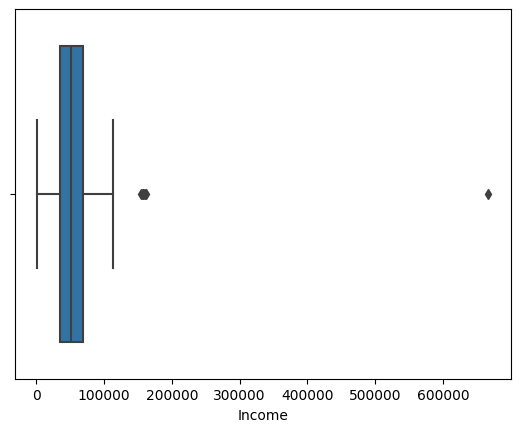

In [40]:
sns.boxplot(x="Income", data=df)
plt.show()

In [41]:
df[df['Income'] >= 120000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Seniority,Relationship_Status,Simplified_Education,TotalChildren,HasChild
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,51,10.24,couple,Postbac,1,1
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,48,10.98,couple,Postbac,2,1
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,49,10.30,seul,Postbac,0,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,42,11.81,couple,Postbac,0,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,53,10.98,couple,Postbac,1,1
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,47,11.07,couple,Postbac,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,75,10.74,couple,Postbac,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,47,10.98,couple,Postbac,1,1


In [42]:
df = df[df['Income'] <= 200000]
df['Income'] = df.Income.astype(int)

/tmp/ipykernel_160167/825696864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df.Income.astype(int)


In [43]:
df.shape

(2208, 33)

In [45]:
remove_id = df.drop('ID', axis=1).columns

n_duplicates = df.duplicated(subset=remove_id).sum()
print(f'There are {n_duplicates} duplicates in the dataset.')

There are 182 duplicates in the dataset.


In [46]:
df.drop_duplicates(subset=remove_id, inplace=True)

/tmp/ipykernel_160167/2200514489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=remove_id, inplace=True)


In [47]:
df.shape

(2026, 33)